In [1]:
%load_ext autoreload
%autoreload 2

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from water_pollution.data.preproc import *
from water_pollution.data import stations
from water_pollution.data import visu

In [4]:
# Builds the small training df (from saone data between 2011-2021)

file_path = '../../raw_data/pc_saone_2011_2021/Analyses.CSV'
rawdf = get_rawdf_from_file(file_path)
small_training_df = build_saone_base_training_data(rawdf)


# Builds the big training df (from saone data between 1980-2011)
file_path = '../../raw_data/nitrate_saone_1980_2021/Analyses.CSV'
rawdf = get_rawdf_from_file(file_path)
big_training_df = build_saone_base_training_data(rawdf)

In [33]:
from tensorflow.keras import models, layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
df = small_training_df.copy()
X = df[['sin_doy','cos_doy','source_dist']]
y = df['nitrate']

In [29]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [30]:
# Preprocessing
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
def init_model(X):
    
    model = models.Sequential()
    
    model.add(layers.Dense(20,activation='relu',input_dim=X.shape[1]))
    model.add(layers.Dense(30,activation='relu'))
    model.add(layers.Dense(10,activation='relu'))
    
    model.add(layers.Dense(1,activation='linear'))
    
    return model


In [37]:
model = init_model(X)
model.compile(loss='mse', optimizer='adam')

es = EarlyStopping(
	patience=10,
	monitor='loss',
	restore_best_weights=True
)

history = model.fit(
	X_train,y_train,
	epochs=1000,  # set it to a large value, early stoping will stop the fit
	batch_size=64, # good values : 16 or 32
	callbacks=[es],
	validation_data=(X_test, y_test),
	verbose=0
)

In [51]:
def plot_loss(history, title=None):
    fig = plt.figure(figsize=(20,7))
    
    # --- LOSS --- 
    ax = plt.gca()
    ax.plot(history.history['loss'])
    ax.plot(history.history['val_loss'])
    ax.set_title('Model loss')
    ax.set_ylabel('Loss')
    ax.set_xlabel('Epoch')
#    ax.set_ylim((0,3))
    ax.legend(['Train', 'Test'], loc='best')
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)

    if title:
        fig.suptitle(title)

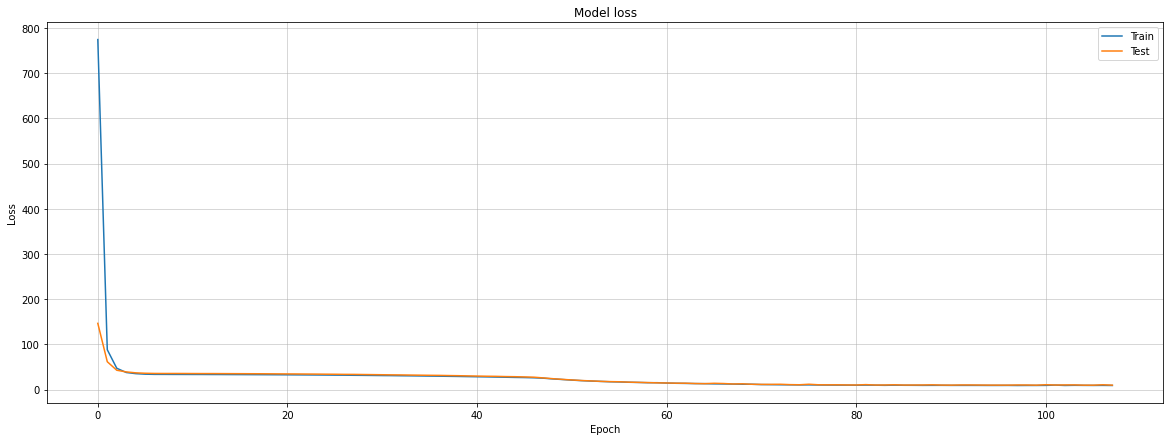

In [52]:
plot_loss(history)